# PCA Raw data and Normalized Data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

d0 = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')
# save the labels into a variable l. Creating lables just for visulization purpose after doing PCA
l = d0['Product_Code']
# Drop the label feature and store the sales data in d. Separating the lable data
d = d0.drop("Product_Code",axis=1)
d.drop(d.columns[0:54], axis=1, inplace=True) # this is a normalized data

In [3]:
raw=d0[d0.columns[1:53]] # this is a raw data
raw.head() # how our data looks after seperating the lables
raw.shape

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


(811, 52)

In [4]:
print(d.shape)
print(l.shape)

(811, 52)
(811,)


In [5]:
d.head()
l

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


0        P1
1        P2
2        P3
3        P4
4        P5
       ... 
806    P815
807    P816
808    P817
809    P818
810    P819
Name: Product_Code, Length: 811, dtype: object

In [6]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

### Raw data

In [7]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(raw)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (811, 2)


<Figure size 432x288 with 0 Axes>

(-2.5500000000000003, 53.55, 0.9188841582530306, 1.0038626591308077)

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Cumulative_explained_variance')

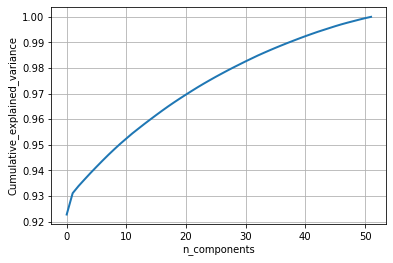

In [8]:
pca.n_components = 52

pca_data_pca = pca.fit_transform(raw)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

a) we can use PCA for the raw data as we can see from the above graph,  the no. of componets are analyzed based on the business goal and how variance is explained for each principle componets. 

b) I Believe whether to use the data or not depends upon our business goal, yes for example, if we want to analyze the the sales data for the overall product then its is sufficient and reduced dimensions will be 10(approx.), however if want to analyze the sales and provide new product introduction or we want to generate business targets for the following year then we may look for 99% of the variance explained. In the latter case the reduced dimensions will be 36-38 approximately.

### Normalized Data

In [9]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(d)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (811, 2)


In [10]:
d.head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


<Figure size 432x288 with 0 Axes>

(-2.5500000000000003, 53.55, 0.29796704151105335, 1.033430140880426)

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Cumulative_explained_variance')

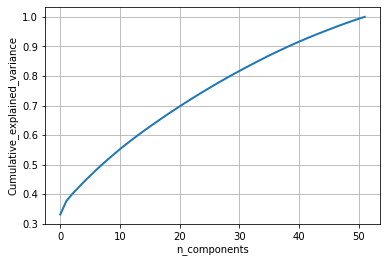

In [11]:
pca.n_components = 52

pca_data_pca = pca.fit_transform(d)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

The above graph is based on the normalized data from the sales data, where the variance for 2 principle components is approximaley 40 % which is quite low and 100% variance is explained only if we consider the data for all the given 52 weeks, its not feasible to consider normalized values rather than raw data. I mean raw data provides effective varaince and we can reduce diminiosns easily.

In raw data,for example consider 2 variables or components: The approximate variance is 93.2% which is best used for model
In normalized data, for example consider 2 variables or components: The approximate varaince is 40% which is not good for effective results

__The best from raw data is  approx 95% variance explaination is captured with 10 variables and reduced dimensions in this case are 42.__

# EDA

## 1. 상품의 판매량기준 상관관계가 높은 데이터 생성

In [12]:
# Calculate correlation between sale quantities
# Use Spearman method to capture non-linear correlation
product_corr = raw.transpose().corr(method='spearman')
print(product_corr.shape)
product_corr.head(5)

(811, 811)


,0,1,2,3,4,5,6,7,8,9,...,801,802,803,804,805,806,807,808,809,810
0,1.000000,0.105156,-0.033156,-0.060961,0.024067,-0.115742,0.034288,-0.083970,0.254553,0.178971,...,0.010585,0.141629,0.145374,-0.089562,-0.111400,0.132112,-0.193239,0.021788,-0.246475,-0.009766
1,0.105156,1.000000,0.051913,0.139827,-0.098849,0.139774,0.023473,0.192785,0.054797,-0.061026,...,0.118540,-0.086185,-0.032924,-0.098239,-0.116745,0.011166,-0.048712,-0.114477,-0.115255,0.098174
2,-0.033156,0.051913,1.000000,0.339249,-0.003896,-0.078649,-0.018139,-0.226969,-0.023219,0.073690,...,-0.324464,-0.033638,-0.240631,0.162646,-0.045399,-0.225324,-0.080792,-0.246736,0.037838,0.120155
3,-0.060961,0.139827,0.339249,1.000000,0.030796,0.071470,0.064682,-0.130114,-0.117943,-0.154483,...,0.050968,-0.311405,-0.127180,0.280844,-0.005571,0.029330,0.131983,0.040744,-0.254841,0.245973
4,0.024067,-0.098849,-0.003896,0.030796,1.000000,-0.096208,0.143222,0.020834,0.100637,0.316596,...,-0.047638,-0.006176,-0.032229,0.115919,0.284669,0.095391,-0.087876,0.108401,0.013865,-0.263292


In [13]:
# Control parameters
corr_thresh = 0.7 # Threshold for correlation score
    # Use >= 0.7 for strongly correlated

In [14]:
# Find and keep high correlations only
high_corr_set = set() # record the individual Product_Code values involved
high_corr_pairs = [] # record the Product_Code pairs and the correlation value

for row in product_corr:
    for col in product_corr.columns:
        if row < col:
            # Get the correlation value, avoiding doing it twice
            corr_val = product_corr.loc[row, col]

            if abs(corr_val) >= corr_thresh:
                # If the correlation value is above the threshold, store it
                #print(row)
                #print(col)
                #print(corr_val)
                high_corr_pairs.append((row, col, corr_val))
                high_corr_set.add(row)
                high_corr_set.add(col)
            
#print(high_corr_list)
# Convert list to a dataframe
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Product_1', 'Product_2', 'Corr'])
print(f"Number of product pairs with correlation >= {corr_thresh} or <= -{corr_thresh}: {high_corr_df.shape[0]}")
print(f"Number of distinct Product_Code values involved: {len(high_corr_set)}")
high_corr_df

Number of product pairs with correlation >= 0.7 or <= -0.7: 14
Number of distinct Product_Code values involved: 20


,Product_1,Product_2,Corr
0,17,190,0.769559
1,214,278,0.700140
2,214,651,0.700140
3,250,252,0.700140
4,250,465,0.700140
5,251,769,0.749652
6,350,642,0.808290
7,381,675,0.700140
8,425,471,0.808290
9,425,675,0.700140


## 2. 상품 매출량이 높은 데이터 생성

In [15]:
# Control parameters
param_top_perc = 0.05 # Percent of products with highest average weekly sale quantity to keep for futher analysis
# Use 0.05 to keep top 40

In [16]:
# Look at most and least popular products
import math
num_products = raw.shape[0]
num_top = math.floor(param_top_perc * num_products)
print(f'Find the most popular and least popular {num_top} products by average weekly sale quantity: ')
print(' ')

# Calculate weekly average sale quantity
avg_weekly_quantity = raw.mean(axis=1)

# Find most popular and least popular products
most_pop_products = avg_weekly_quantity.nlargest(n=num_top).index.values.tolist()
least_pop_products = avg_weekly_quantity.nsmallest(n=num_top).index.values.tolist()

# Extract raw data for these products
most_pop_raw_data = raw[raw.index.isin(most_pop_products)]
least_pop_raw_data = raw[raw.index.isin(least_pop_products)]

print(f"Have dataframe with {num_top} most popular products: {most_pop_raw_data.shape[0]}")
most_pop_raw_data

Find the most popular and least popular 40 products by average weekly sale quantity: 
 
Have dataframe with 40 most popular products: 40


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
14,19,45,47,42,29,44,43,36,25,52,...,38,35,33,30,37,30,30,34,38,20
15,30,27,27,43,29,32,49,41,49,38,...,40,30,33,39,42,45,31,31,23,22
23,36,42,27,33,40,48,38,39,41,39,...,38,36,39,32,31,39,23,40,32,14
26,44,34,33,39,34,30,47,27,45,39,...,40,33,32,26,26,29,44,30,34,28
33,47,42,24,55,42,23,41,51,45,29,...,29,25,38,46,46,34,34,45,41,26
34,34,37,26,27,49,48,36,34,28,41,...,43,33,28,25,31,44,24,25,43,28
35,41,32,39,45,38,40,39,39,27,48,...,26,37,27,29,50,31,31,28,36,19
36,36,39,43,42,38,37,31,26,36,29,...,35,32,34,40,27,27,30,27,37,29
37,37,36,43,52,61,50,35,52,49,46,...,41,38,37,35,32,28,48,35,24,24
39,41,27,27,51,37,38,48,40,39,40,...,23,38,36,40,44,39,37,24,27,22


### 3. 판매량기준 상/하위 제품의 상관관계를 확인

In [17]:
# Convert the high correlation set to a list
high_corr_list = list(high_corr_set)

# Apply the list - most popular
most_pop_with_strong_corr = most_pop_raw_data[most_pop_raw_data.index.isin(high_corr_list)]
print(f"Number of most popular Product_Code values in the high correlation list: {most_pop_with_strong_corr.shape[0]}")
most_pop_with_strong_corr

Number of most popular Product_Code values in the high correlation list: 1


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
190,48,36,42,35,44,39,37,45,42,40,...,33,20,25,36,36,28,35,35,34,24


In [18]:
# Apply the list - least popular
least_pop_with_strong_corr = least_pop_raw_data[least_pop_raw_data.index.isin(high_corr_list)]
print(f"Number of least popular Product_Code values in the high correlation list: {least_pop_with_strong_corr.shape[0]}")
least_pop_with_strong_corr.head(15)

# Least popular products are very rarely bought (multiple weeks of zero items sold) and have high correlation with each other
# As the products only have weekly sale quantity numbers, the analysis of low popularity products ends here

Number of least popular Product_Code values in the high correlation list: 15


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 4. 판매량기준 상/하위 제품의 상관관계를 확인

In [19]:
autocorr_nlags_max = 13 # Maximum number of lags for calculating autocorrelation
# Use 13 because 13 weeks is approximately one quarter, i.e. look at repeat purchases within a quarter

In [20]:
# Examine purchase cycles of most popular products
# Transpose most_pop_raw_data so that the products are listed horizontally (i.e. in the column names)
most_pop_raw_data_horz = most_pop_raw_data.transpose()

# Define function for easy to repeat autocorrelation
def acf(df, nlags_max):
    output_list = []
    for col in df:
        # For each column in the dataframe, extract the column as a series
        series = df[col]
        for nlag in range(1, nlags_max + 1):
            # Calculate autocorrelation for lags from 1 to nlgas_max
            output_list.append((col, nlag, series.autocorr(lag=nlag)))
            
    output_df = pd.DataFrame(output_list, columns=['Product_Code', 'nlag', 'Autocorr'])
    return output_df

# Use the function
most_pop_autocorr = acf(most_pop_raw_data_horz, autocorr_nlags_max)

print(f"Shape of most_pop_autocorr is {most_pop_autocorr.shape}")
most_pop_autocorr

Shape of most_pop_autocorr is (520, 3)


,Product_Code,nlag,Autocorr
0,14,1,0.250955
1,14,2,0.209691
2,14,3,0.264781
3,14,4,0.386127
4,14,5,0.070833
...,...,...,...
515,406,9,-0.192147
516,406,10,-0.340993
517,406,11,-0.229771
518,406,12,-0.293299


In [21]:
most_pop_autocorr.head(autocorr_nlags_max)

,Product_Code,nlag,Autocorr
0,14,1,0.250955
1,14,2,0.209691
2,14,3,0.264781
3,14,4,0.386127
4,14,5,0.070833
5,14,6,0.170801
6,14,7,0.181742
7,14,8,0.347373
8,14,9,-0.084029
9,14,10,0.138069
